**INTRODUCCIÓN A MATPLOTLIB**


**Elaborado por: Yomin E. Jaramillo M.**

**Para la asignatura: Automatización 1**

Matplotlib es el paquete mas utlizado para visualización y análisis exploratorio de de datos. Sin embargo hay otros paquetes complementarios que pueden ayudar en esa tarea como seaborn.

Para empear a trabajar con maplotlib primero importamos los paquetes necesarios, incluyendo el de ínteres

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

En este notebook trabajaramos con la base de datos publica de Kaggle https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction la cual relaciona 11 caracteristicas con la falla cardiaca. Cargue la base de datos a su Notebook para tabarar con ella durante esta introducción

In [ ]:
from google.colab import drive
import sys
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Auto 1'
#puede confirmar su ubiación mediante:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Auto 1/heart.csv')
df

/content/drive/MyDrive/Colab Notebooks/Auto 1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Podemos tener una descripción general de nuestra base de datos haciendo uso de los métodos de pandas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df['HeartDisease'].value_counts() #cuenta la cantidad de veces que aparece un valor en la columna especifica


1    508
0    410
Name: HeartDisease, dtype: int64

Los tipos mas comunes de graficos que podemos hacer con matplotlib son:

*   Bar Graph
*   Pie Chart
*   Box Plot
*   Histogram
*   Line Chart and Subplots
*   Scatter Plot

Teniendo en cuenta que ya definimos los paquetes que vamos a usar podemos definir una oja de estilos para los gráficos de matplotlib que establece una linea de diseño de tal forma que los gráficos sean claros y legibles. En este caso se uso el estilo ggplot, sin embargo puede consultar mas estilos dependiendo su necesidad en: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [ ]:
plt.style.use('ggplot')

**BAR GRAPH**

Los gráficos de barras se utilizan cuando necesitamos comparar la cantidad de valores categóricos

El metodo pivot_table crea una tabla como dataFrame desde nuestra base de datos original, relaciona la variable categorica como índice y el uso adecuado debe ser asociar una variable numerica a la cual se le aplica una función de agrupación con respecto a la variable categorica.
En este caso Oldpeak es el valor numerico medido en depresion, como la función es una suma, el método nos presentar una tabla donde se resume la suma de todos los Oldpeak del tipo ASY, ATA, NAP y TA

In [ ]:
df['ChestPainType'].unique()


array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

                Oldpeak
ChestPainType          
ASY            1.162702
ATA            0.307514
NAP            0.674877
TA             1.036957


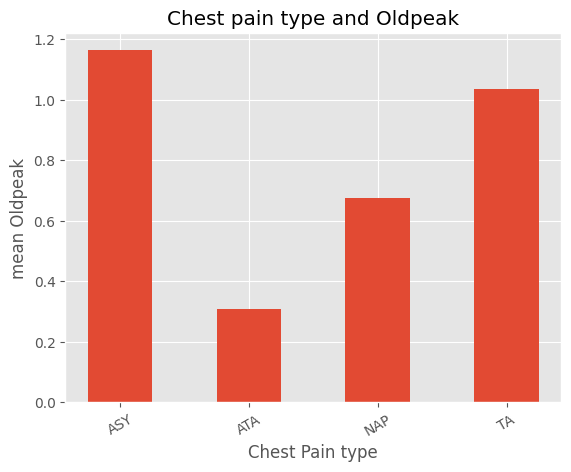

In [ ]:
table = pd.pivot_table(data=df,index='ChestPainType',values='Oldpeak', aggfunc=np.mean) #crea la tabla como dataframe
print(table)
# Barplot
plt.bar(table.index,table['Oldpeak'], width=0.5) #genera el grafico de barras respecto a la tabla creada
plt.xticks(rotation=30) #Angulo de rotación de las etiquetas del eje X
plt.xlabel('Chest Pain type') #nombre eje x
plt.ylabel('mean Oldpeak')  #nombre eje y
plt.title('Chest pain type and Oldpeak') #titulo
plt.show()#mostrar figura

**EJERCICIO 1:** Cargue la base de datos de jugadores de cricker que fue usada en el notebook introductorio a pandas y presente una grafica de barras que le muestre el promedio de edad de vida entre para los jugadores diestros y zurdos

**PIE CHART**

Un diagrama de torta o de pie puede ser adecuado cuando queremos ver como se distribuyen los datos entre caracteristicas.

In [ ]:
#dictionary for ChestPainType and its total HeartDisease
H_diseas = {}#creo un diccionario vacio para agregar los valores de ChestPainType y cuantos tienen enfermedad cardiaca
total = df['HeartDisease'].sum()#Extraigo el valor total de la variable a analizar, en este caso de pacientes con HeartDisease


for i in range(df['ChestPainType'].nunique()): #el metodo nunique retorna la cantidad de valores diferentes que hay en una columna especifica
                                              # en este caso, la columna HeartDisease tiene 4 posibles valores diferentes, por lo tanto el
                                              #ciclo for se ejecutara 4 veces

  x = df['ChestPainType'].unique()[i] #se le asigna el el valor de cada posible valor de 'ChestPainType' a la variable x, 1 en cada ciclo

  x_heartdisease = df[df['ChestPainType']==x]['HeartDisease'].sum() #suma la cantidad de pacientes que tienen un tipo de ChestPainType especifico y presetan falla cardiaca
  H_diseas[x] = x_heartdisease/total #divide el valor anterior por el total de fallas cardiacas y lo agraga al diccionario

In [ ]:
H_diseas

{'ATA': 0.047244094488188976,
 'NAP': 0.14173228346456693,
 'ASY': 0.7716535433070866,
 'TA': 0.03937007874015748}

In [ ]:
[x*100 for x in H_diseas.values()]

[4.724409448818897, 14.173228346456693, 77.16535433070865, 3.937007874015748]

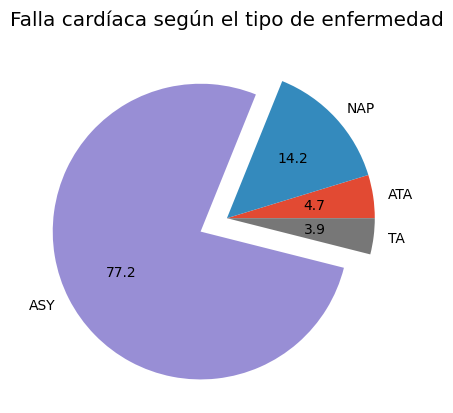

In [ ]:
#pie plot 
plt.pie([x*100 for x in H_diseas.values()],labels=[x for x in H_diseas.keys()],autopct='%0.1f',explode=[0,0,0.2,0]) 

#label the plot 
plt.title('Falla cardíaca según el tipo de enfermedad') 
plt.show()

**Ejercicio 2:** Con la misma base de datos que hizo el ejercicio 1. Haga un diagrama de pie donde relacione los porcentajes de los jugadores diestos y zurdos de los que han fallecido.

**BOX PLOTS**

Los Boxplots dan información estadistica acerca de la distribución de los datos numericos dividiendolos en diferentes grupos, es útil para la detección de outliers en cada grupo.

En este ejemplo haremos una analisis de los valores de colesterol para cada tipo de dolor en el pecho.


In [ ]:
 df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
tec_col={} #creamos un diccionario donde relacionamos el tipo de enfermedad cardiaca y los niveles de colesterol
for i in df['ChestPainType'].unique(): #creamos un for que itere a lo largo de cada tipo de ChestPainType
  tec_col[i]=df[df['ChestPainType']==i].Cholesterol #asignamos al diccionario cada tipo de dolor como clave y los valores de colesterol asociados

Veamos lo que nos queda en el diccionario para mayor claridad

Ahora creamos el Box plot

In [ ]:
[x for x in tec_col.values()]

[0      289
 2      283
 6      237
 7      208
 9      284
       ... 
 903    221
 904    240
 906    342
 910    157
 916    236
 Name: Cholesterol, Length: 173, dtype: int64,
 1      180
 4      195
 5      339
 10     211
 14     211
       ... 
 891    278
 892    220
 896    253
 905    212
 917    175
 Name: Cholesterol, Length: 203, dtype: int64,
 3      214
 8      207
 13     234
 16     196
 18     248
       ... 
 909    197
 911    176
 912    241
 914    193
 915    131
 Name: Cholesterol, Length: 496, dtype: int64,
 20     223
 88     291
 118    160
 119    156
 165    272
 195    193
 199    308
 200    249
 215    237
 237    295
 245    171
 294      0
 335      0
 355      0
 396      0
 482    270
 488    252
 492      0
 513    258
 547    200
 549    181
 553    216
 611    139
 628    234
 633    211
 634    199
 652    273
 678    240
 679    233
 700    244
 702    270
 733    226
 758    213
 773    193
 775    231
 784    282
 785    234
 789    182
 813   

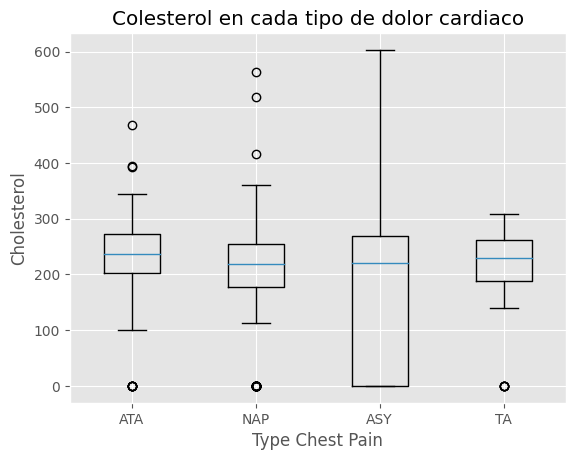

In [ ]:
plt.boxplot([x for x in tec_col.values()], labels=[x for x in tec_col.keys()])
plt.xlabel('Type Chest Pain')
plt.ylabel('Cholesterol')
plt.title('Colesterol en cada tipo de dolor en pecho')
plt.show()

**Ejercicio 3:** Con la misma base de datos que ha hecho los anteriores ejercicios, haga un analisis mediante el boxplot de la caracterstica "life" con respecto a los jugadores diestros y zurdos. Escriba sus conclusiones y/o inferencias 

**Histogramas**

Un histograma muestra la distribución de los datos numericos mediante intervalos continuos. Es útil para hacer analisis de frecuencia en las variables aleatorias y la simetria de los datos.
En este caso analizaremos la caracteristica RestingECG.

Empezemos definiendo que valores puede tomar esta característica según nuestra base de datos

In [ ]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

Se puede observar que puede tener tres valores, ahora analicemos con que frecuencia aparecen estos en la base de datos mediante el histograma

Text(0.5, 1.0, 'Histograma 1-RestingECG')

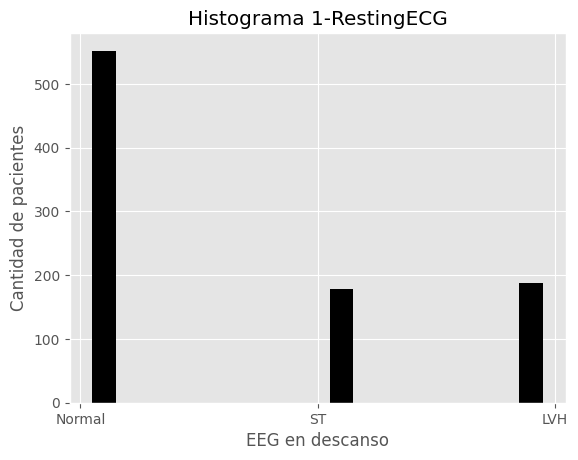

In [ ]:
plt.hist(df['RestingECG'], rwidth=0.5, color='black')
plt.xlabel('EEG en descanso')
plt.ylabel('Cantidad de pacientes')
plt.title('Histograma 1-RestingECG')

El análisis de varaibles numeriacas aleatorios es muy común y util en el uso de histrogramas

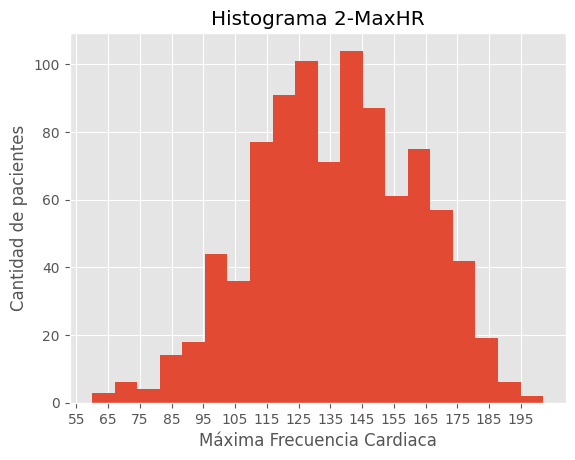

In [ ]:
plt.hist(df['MaxHR'], bins=20)
plt.xticks(range(55,205,10))
plt.xlabel('Máxima Frecuencia Cardiaca')
plt.ylabel('Cantidad de pacientes')
plt.title('Histograma 2-MaxHR')
plt.show()

**EJERCICIO 4:** Haga un análsis mediante histograma de la característica "year" de la base de datos de los jugadores de cricker e identifiquen entre que periodos nacieron mas y menos jugadores respectivamente

**SCATTER PLOT**


Los scatter plots son de ayuda para analizar como se relacionan 2 variables. Mediante este grefico se puede analizar la correlación entre variables y visualizar outliers

En este caso visualizaremos un scatter plot entre las caracteristicas Cholesterol y MaxHR

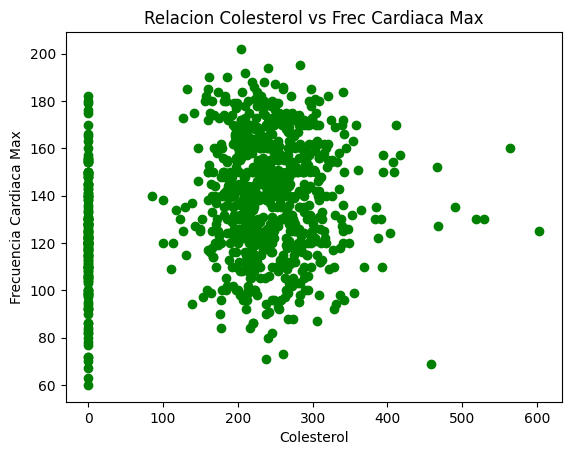

In [ ]:
plt.scatter(df['Cholesterol'],df['MaxHR'], color='green')
plt.xlabel('Colesterol')
plt.ylabel('Frecuencia Cardiaca Max')
plt.title('Relacion Colesterol vs Frec Cardiaca Max')
plt.show()

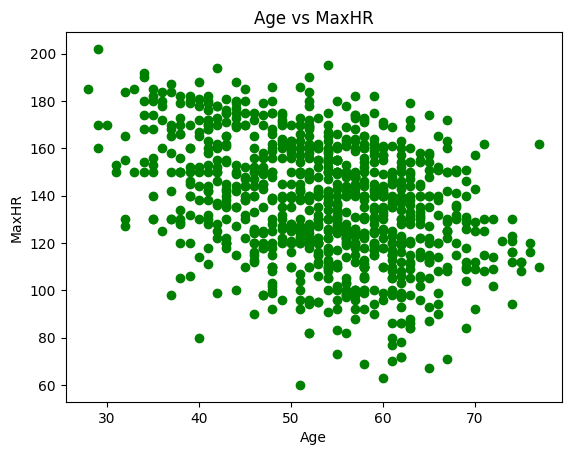

In [ ]:
plt.scatter(df['Age'],df['MaxHR'], color='green')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Age vs MaxHR')
plt.show()

**LINE PLOTS Y SUBPLOTS**

Un Line Plot es útil para para visualizar la tendencia de una variable numerica durante un intervalo de tiempo continuo.

Para este ejemplo graficaremos un canal de señal de EMG, este canal hace parte de una base de datos publica que esta disponibl en Kaggle:

In [ ]:
EMG_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Auto 1/EMG-data.csv') #noten que no es necesario hacer un reenlace con Drive por que ya lo hicimos
EMG_df                                                                        #Solo necesitamos definir la base de datos con base en el archivo

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4237902,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237903,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237904,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237905,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36


Ahora graficamos.

Text(0.5, 1.0, 'Channel 1')

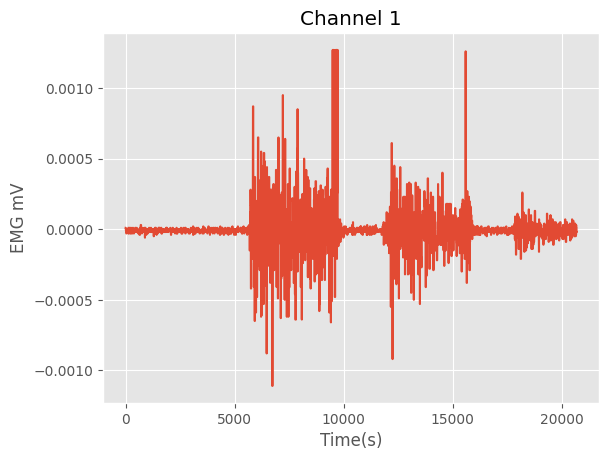

In [ ]:
plt.plot(EMG_df.loc[0:20000]['time'],EMG_df.loc[0:20000]['channel1'])
plt.xlabel('Time(s)')
plt.ylabel('EMG mV')
plt.title('Channel 1')

Es posible que en ciertas ocaciones se necesite comparar varias graficas en un misma figura, en este caso se usan subplots, donde cada gráfica se convierte en una subfigura de un Figura general.

Para entender como trabajar con Subplots necesitamos entender lo que es Figure, Axes y Axis en un grafico de matplotlib.

La Figure es el contenedor mas grande de un grafico matplotlib, este puede contener uno o varios graficos llamados Axes. Y cada uno de estos graficos tiene ejes, 'x' y 'y' que se conocen como Axis.

Al usar plt.subplots obtenemos la Figure y los Axes, nosotros podemos decirle a la función como queremos mostrar los Axes en la figura, lo cual se hace estableciendo parametros como nrows y ncols. Adicionalmente es posible ajustar el tamaño de la figura usando figsize().

Los Axes son devueltos por la función como una lista, y se puede acceder a ellos como un objeto en una lista. Finalmente, el proceso de graficación es el mismo que en casos anteriores.

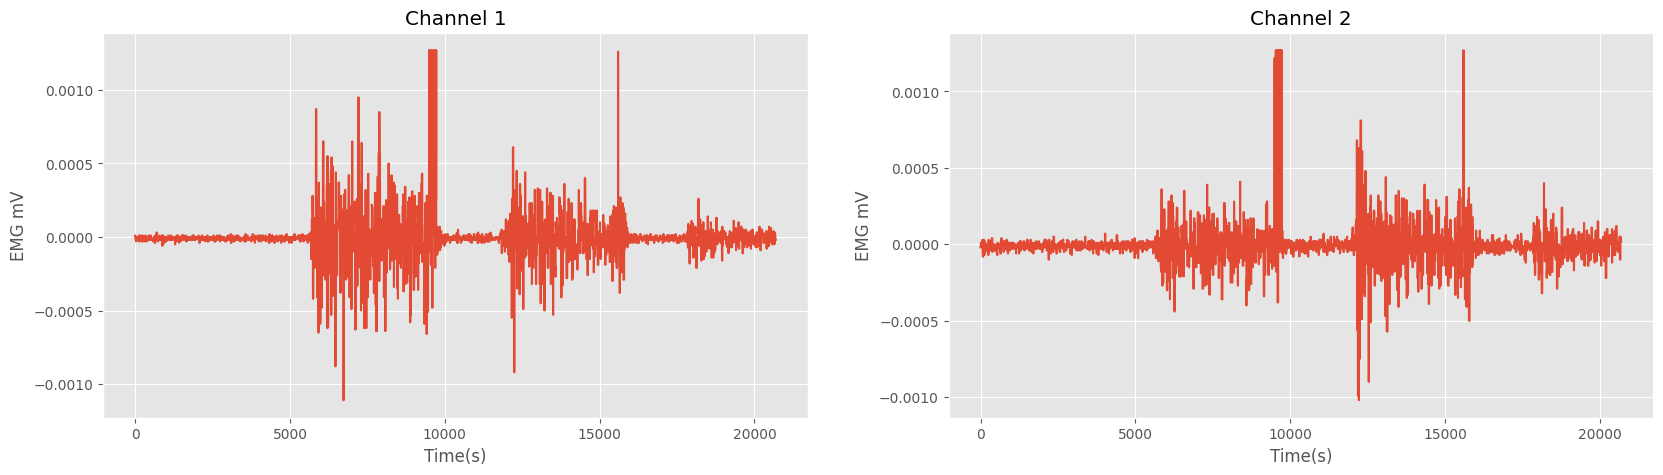

In [ ]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(20,5))   # retorna una figure general y la configuracion de axes como list
axs[0].plot(EMG_df.loc[0:20000]['time'],EMG_df.loc[0:20000]['channel1'])  #toma la lista axs en la primera posición para hacer el gráfico que le estamos indicando
axs[0].set_xlabel('Time(s)')
axs[0].set_ylabel('EMG mV')
axs[0].set_title('Channel 1')

axs[1].plot(EMG_df.loc[0:20000]['time'],EMG_df.loc[0:20000]['channel2'])  #toma la lista axs en la segunda posición para hacer el gráfico que le estamos indicando
axs[1].set_xlabel('Time(s)')
axs[1].set_ylabel('EMG mV')
axs[1].set_title('Channel 2')
plt.show()

**Ejercicio 5:** Hacer un subplot de 4 gráficos donde relacionen varios tipos de graficos de los vistos

DOCUMENTACION ADICIONAL:

https://towardsdatascience.com/a-beginners-guide-to-data-visualization-using-matplotlib-22b15a0b090